Here I will try to explore fantasy basketball data and create player pricing algorithms using linear regression and random forest. Dataset(https://www.kaggle.com/dogacandu/fantasy-basketball-dataset) contains:

players.json

    File format: JSON
    File contains metadata, fantasy scores and prices for players in Euroleague
    

players_metadata.csv

    File format: csv
    File contains position and nationality for each player   
    
    
#### first import necessary modules

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns




####  read json file

In [2]:
data=pd.read_json("/home/dogacan/Documents/interview/fantasy/players.json")
data.head()

,cost,first_name,id,is_bye,last_name,locked,notes,positions,squad_id,stats,status
0,350000,Janis,1,0,Strelnieks,0,{},[2],12,"{'scores': {'33': 3, '32': 8.8, '31': -2, '30'...",playing
1,680000,Antanas,2,0,Kavaliauskas,0,{},[1],16,"{'scores': {'33': 4.4, '32': 13, '31': 2.2, '3...",playing
2,460000,Dairis,3,1,Bertans,0,{},[3],7,"{'scores': {'30': 1, '29': 5.5, '28': 0, '27':...",not-playing
3,280000,Nikos,4,0,Pappas,0,{},[3],13,"{'scores': {'33': -1, '32': -2, '31': -1.8, '3...",playing
4,180000,Sinan,5,0,Guler,0,{},"[2, 3]",9,"{'scores': {'23': 2.2, '22': 0, '21': 2, '19':...",playing


In [66]:
for field in list(data.status.unique()):
    print("{} number is {}".format(str(field), data[data.status==field]['status'].count()))



playing number is 112
not-playing number is 110
transferred number is 21
injured number is 24
uncertain number is 7


#### Lets look a bit more in detail to the stats column

In [3]:
stats=data.stats.apply(pd.Series)
stats['player_id']=data.id
stats.head(3)

,scores,match_scores,round_rank,season_rank,games_played,total_points,avg_points,high_score,low_score,last_3_avg,last_5_avg,selections,owned_by,prices,player_id
0,"{'33': 3, '32': 8.8, '31': -2, '30': 6, '29': ...","{'2017330251': 3, '2017320247': 8.8, '20173102...",59,116,33,235.9,7.15,24.2,-3.0,3.27,3.36,4966,5.00,"{'1': 1000000, '2': 970000, '3': 890000, '4': ...",1
1,"{'33': 4.4, '32': 13, '31': 2.2, '30': 5.5, '2...","{'2017330251': 4.4, '2017320247': 13, '2017310...",50,141,32,175.6,5.49,20.9,-2.7,6.53,7.66,2172,2.19,"{'1': 720000, '2': 730000, '3': 730000, '4': 6...",2
2,"{'30': 1, '29': 5.5, '28': 0, '27': 10, '26': ...","{'2017300234': 1, '2017290227': 5.5, '20172802...",0,144,28,151.9,5.43,17.0,-3.0,2.17,4.70,1924,1.94,"{'1': 820000, '2': 850000, '3': 960000, '4': 1...",3


####   Describe&visualize player costs, avg_points, selections :

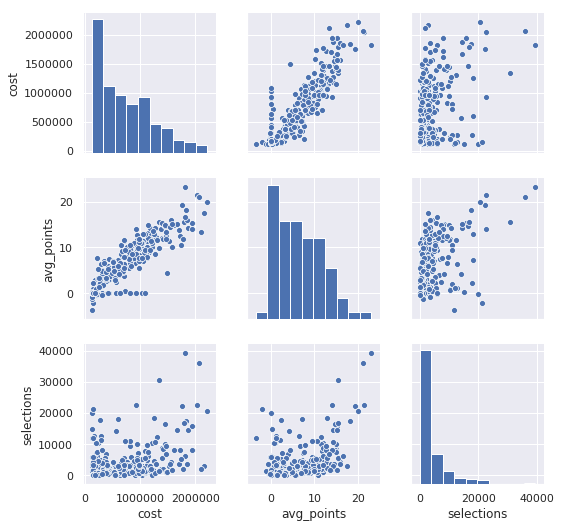

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  #to display more than one output
data.cost.describe().astype(int)
stats.avg_points.describe() 
stats.selections.describe()
df_2=pd.DataFrame()
df_2['cost']=data.cost
df_2['avg_points']=stats.avg_points
df_2['selections']=stats.selections
sns.set()
sns.pairplot(df_2)

-  avg_points seems to correlated with player cost

####  Let's read csv file

In [5]:
player_df=pd.read_csv("/home/dogacan/Documents/interview/fantasy/players_metadata.csv",delimiter="|")
player_df.head(3)

,Player_Name,position,nationality
0,"ABALDE, ALBERTO",Forward,Spain
1,"ABASS, AWUDU",Guard,Italy
2,"ADAMS, JOSH",Guard,United States of America


####  to match names, first upper first and last names in data and combine them:



In [6]:
data['Player_Name']=data.last_name.str.upper()+", "+data.first_name.str.upper()
data['avg_points']=stats.avg_points
data.head(3)


,cost,first_name,id,is_bye,last_name,locked,notes,positions,squad_id,stats,status,Player_Name,avg_points
0,350000,Janis,1,0,Strelnieks,0,{},[2],12,"{'scores': {'33': 3, '32': 8.8, '31': -2, '30'...",playing,"STRELNIEKS, JANIS",7.15
1,680000,Antanas,2,0,Kavaliauskas,0,{},[1],16,"{'scores': {'33': 4.4, '32': 13, '31': 2.2, '3...",playing,"KAVALIAUSKAS, ANTANAS",5.49
2,460000,Dairis,3,1,Bertans,0,{},[3],7,"{'scores': {'30': 1, '29': 5.5, '28': 0, '27':...",not-playing,"BERTANS, DAIRIS",5.43


####  now I can merge 

In [7]:
merged_df=pd.merge(data,player_df,how='inner',left_on='Player_Name',right_on='Player_Name')
merged_df.head(3)

,cost,first_name,id,is_bye,last_name,locked,notes,positions,squad_id,stats,status,Player_Name,avg_points,position,nationality
0,350000,Janis,1,0,Strelnieks,0,{},[2],12,"{'scores': {'33': 3, '32': 8.8, '31': -2, '30'...",playing,"STRELNIEKS, JANIS",7.15,Guard,Latvia
1,680000,Antanas,2,0,Kavaliauskas,0,{},[1],16,"{'scores': {'33': 4.4, '32': 13, '31': 2.2, '3...",playing,"KAVALIAUSKAS, ANTANAS",5.49,Center,Lithuania
2,460000,Dairis,3,1,Bertans,0,{},[3],7,"{'scores': {'30': 1, '29': 5.5, '28': 0, '27':...",not-playing,"BERTANS, DAIRIS",5.43,Guard,Latvia


#### most common 3 nationalities among players and boxplots for avg_points for each type of position for the top-3 nationalities are:

nationality
United States of America    67
Serbia                      24
Spain                       21
dtype: int64

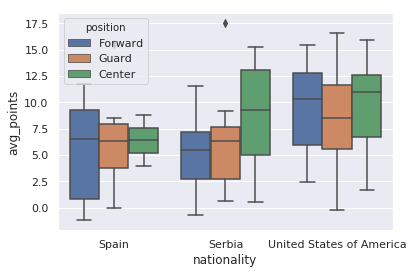

In [8]:
merged_df.groupby('nationality').size().sort_values(ascending=False).head(3)
top3=merged_df[merged_df.nationality.isin(['United States of America','Serbia','Spain'])]
sns.boxplot(x='nationality',y='avg_points',hue='position',data=top3)

#### Now I want to extract scores, price change and percentage price change for each player-round pair. I will also create columns for previous round score and price: 

In [11]:
player_list=[]
round_list=[]
price_list=[]
price_change_list=[]
percantage_change_list=[]
score_list=[]
prevscore_list=[]
prevprice_list=[]
for i in range(len(stats.prices)):
    player=stats.player_id[i]
    for key,value in stats.prices[i].items():
        round=int(key)
        try:
            price=stats.prices[i][str(round)]
            price_change=stats.prices[i][str(round+1)]-stats.prices[i][str(round)]
            percentage_change=(stats.prices[i][str(round+1)]-stats.prices[i][str(round)])/stats.prices[i][str(round)]
        except KeyError:
            price=0
            price_change=0
            percentage_change=0;
        player_list.append(player)
        round_list.append(round)
        price_list.append(price)
        price_change_list.append(price_change)
        percantage_change_list.append(percentage_change)
        try:
            score=stats.scores[i][str(round)]
        except KeyError:
            score=0
        score_list.append(score)
        try:
            prevscore=stats.scores[i][str(round-1)]
            prevprice=stats.prices[i][str(round-1)]
        except KeyError:
            prevscore=0
            prevprice=0
        prevscore_list.append(prevscore)
        prevprice_list.append(prevprice)
        
change=pd.DataFrame({'player_id':player_list,'rounds':round_list,'score':score_list,'price':price_list,'price_change':price_change_list,'percentage_change':percantage_change_list,'prevscore':prevscore_list,'prevprice':prevprice_list})
change[0:7]
 




,player_id,rounds,score,price,price_change,percentage_change,prevscore,prevprice
0,1,1,6.6,1000000,-30000,-0.030000,0.0,0
1,1,2,1.1,970000,-80000,-0.082474,6.6,1000000
2,1,3,2.2,890000,-130000,-0.146067,1.1,970000
3,1,4,17.6,760000,10000,0.013158,2.2,890000
4,1,5,1.0,770000,-40000,-0.051948,17.6,760000
5,1,6,16.0,730000,60000,0.082192,1.0,770000
6,1,7,13.2,790000,100000,0.126582,16.0,730000


#### check correlation matrix of last round score, previous 5 rounds avg score and percentage change

#### Let's visualize first 5 players price changes

/home/dogacan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


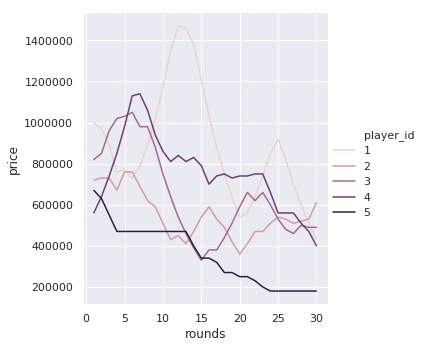

In [12]:
sns.relplot(x="rounds", y="price", 
            hue="player_id", 
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=change[change.rounds<=30][change.player_id<=5])
plt.show()

#### I want to predict player price. I take rounds 2-25 as train set and remaining rounds as test set. I will train model with player_id, rounds, prevscore and prevprice

In [13]:
train_df=change[change.rounds>1][change.rounds<=25].drop(['price','price_change','percentage_change','score'],axis=1)
target=change[change.rounds>1][change.rounds<=25].price
test_df=change[change.rounds>25][change.rounds<34].drop(['price','price_change','percentage_change','score'],axis=1)
test_target=change[change.rounds>25][change.rounds<34].price
train_df.head()


/home/dogacan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/dogacan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/dogacan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dogacan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,player_id,rounds,prevscore,prevprice
1,1,2,6.6,1000000
2,1,3,1.1,970000
3,1,4,2.2,890000
4,1,5,17.6,760000
5,1,6,1.0,770000


#### linear regression gives:

In [15]:
import statsmodels.formula.api as sm
result = sm.ols(formula='target ~ rounds+ prevscore + prevprice+ C(player_id)', data=train_df).fit()
predict=result.predict(test_df)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test_target, predict))

148458.04534842176


#### Random Forest has better accuracy:

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(train_df, target)
preds = model.predict(test_df)
print(mean_absolute_error(test_target, preds))


/home/dogacan/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

87393.27098540145
